Import database by connecting to SQLite and loading into a pandas dataframe.

In [55]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('src/data/agri.db')
query = "SELECT * FROM farm_data;"  # Replace with the correct table name
df = pd.read_sql_query(query, conn)
conn.close()


Next we will, inspect overall structure of dataframe

In [56]:
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  object 
 11  Nutrient P Sensor (ppm)       51791 non-null  object 
 12  Nutrient K Sensor (ppm)       53788 non-null  object 
 13  p

System Location Code Previous Cycle Plant Type           Plant Type  \
0                Zone_D                     Herbs           Vine Crops   
1                Zone_G                     Herbs           VINE CROPS   
2                Zone_F                     Herbs                herbs   
3                Zone_G                     Herbs  fruiting vegetables   
4                Zone_B                Vine Crops         LEAFY GREENS   
..                  ...                       ...                  ...   
95               Zone_F                Vine Crops  Fruiting Vegetables   
96               Zone_F                Vine Crops  Fruiting Vegetables   
97               Zone_E       Fruiting Vegetables           VINE CROPS   
98               Zone_G                     Herbs           Vine Crops   
99               Zone_E                Vine Crops  fruiting vegetables   

   Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
0     Maturity                    23.34                  NaN   
1   Vegetative                   -24.16                63.14   
2     maturity                    23.84                  NaN   
3   Vegetative                    22.61                  NaN   
4     seedling                    22.88                  NaN   
..         ...                      ...                  ...   
95  Vegetative                    22.58                  NaN   
96  Vegetative                    22.58                  NaN   
97    Maturity                    22.17                  NaN   
98  VEGETATIVE                    22.64                  NaN   
99    Maturity                    22.74                67.41   

    Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                          454.0               937              1.82   
1                          441.0               938              2.13   
2                          562.0              1246              1.21   
3                          651.0              1346              1.96   
4                          144.0               812              2.76   
..                           ...               ...               ...   
95                         672.0              1382              0.97   
96                         672.0              1382              0.97   
97                         545.0               974              1.95   
98                         573.0               910              1.22   
99                         625.0              1420              1.82   

    O2 Sensor (ppm) Nutrient N Sensor (ppm) Nutrient P Sensor (ppm)  \
0                 4                     161                      64   
1                 6                     161                      53   
2                 8                     228                      79   
3                 6                    None                  53 ppm   
4                 5                      61                      19   
..              ...                     ...                     ...   
95                7                     179                      51   
96                7                     179                      51   
97                4                     199                      60   
98                5                     172                      67   
99               10                     250                      68   

   Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
0                      201        6.1                28.150346  
1                     None        6.5                31.000000  
2                      292        6.4                26.000000  
3                      289        6.6                      NaN  
4                      168        5.5                28.000000  
..                     ...        ...                      ...  
95                     229        6.5                24.000000  
96                     229        6.5                24.000000  
97                     217        6.0     

We can see there are problems with the dataset from the above step. Now we will start with data cleaning. First we will need to change the data type for Nutrient N, P and K by converting it to numeric columns. Afterwards we check for missing values and duplicates. 

In [57]:
df['Nutrient N Sensor (ppm)'] = pd.to_numeric(df['Nutrient N Sensor (ppm)'], errors='coerce')
df['Nutrient P Sensor (ppm)'] = pd.to_numeric(df['Nutrient P Sensor (ppm)'], errors='coerce')
df['Nutrient K Sensor (ppm)'] = pd.to_numeric(df['Nutrient K Sensor (ppm)'], errors='coerce')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47287 non-null  float64
 11  Nutrient P Sensor (ppm)       51534 non-null  float64
 12  Nutrient K Sensor (ppm)       53526 non-null  float64
 13  p

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
1               Zone_G                     Herbs           VINE CROPS   
2               Zone_F                     Herbs                herbs   
3               Zone_G                     Herbs  fruiting vegetables   
4               Zone_B                Vine Crops         LEAFY GREENS   

  Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
0    Maturity                    23.34                  NaN   
1  Vegetative                   -24.16                63.14   
2    maturity                    23.84                  NaN   
3  Vegetative                    22.61                  NaN   
4    seedling                    22.88                  NaN   

   Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                         454.0               937              1.82   
1                         441.0               938              2.13   
2                         562.0              1246              1.21   
3                         651.0              1346              1.96   
4                         144.0               812              2.76   

   O2 Sensor (ppm)  Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
0                4                    161.0                     64.0   
1                6                    161.0                     53.0   
2                8                    228.0                     79.0   
3                6                      NaN                      NaN   
4                5                     61.0                     19.0   

   Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
0                    201.0        6.1                28.150346  
1                      NaN        6.5                31.000000  
2                    292.0        6.4                26.000000  
3                    289.0        6.6                      NaN  
4                    168.0        5.5                28.000000

In [58]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values: \n", missing_values)
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)


Missing values: 
 System Location Code                0
Previous Cycle Plant Type           0
Plant Type                          0
Plant Stage                         0
Temperature Sensor (°C)          8689
Humidity Sensor (%)             38867
Light Intensity Sensor (lux)     4278
CO2 Sensor (ppm)                    0
EC Sensor (dS/m)                    0
O2 Sensor (ppm)                     0
Nutrient N Sensor (ppm)         10202
Nutrient P Sensor (ppm)          5955
Nutrient K Sensor (ppm)          3963
pH Sensor                           0
Water Level Sensor (mm)          8642
dtype: int64
Number of duplicates: 7489


We can observe that there are missing values and duplicate rows to be handled.

In [59]:
# Drop duplicate rows
df = df.drop_duplicates()
duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


After removing duplicate rows, there are only 50,000 rows of data. Given the large number of missing values for each column, we will handle missing values by using the mean value instead of removing the rows as this will affect a huge portion of available data

In [60]:

numerical_columns = ['Temperature Sensor (°C)', 'Humidity Sensor (%)', 'Light Intensity Sensor (lux)', 
                     'CO2 Sensor (ppm)', 'EC Sensor (dS/m)', 'O2 Sensor (ppm)', 
                     'Nutrient N Sensor (ppm)', 'Nutrient P Sensor (ppm)', 'Nutrient K Sensor (ppm)', 
                     'pH Sensor', 'Water Level Sensor (mm)']

# Filling missing values with the mean of each column
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

missing_values = df.isnull().sum()
print("Missing values: \n", missing_values)

Missing values: 
 System Location Code            0
Previous Cycle Plant Type       0
Plant Type                      0
Plant Stage                     0
Temperature Sensor (°C)         0
Humidity Sensor (%)             0
Light Intensity Sensor (lux)    0
CO2 Sensor (ppm)                0
EC Sensor (dS/m)                0
O2 Sensor (ppm)                 0
Nutrient N Sensor (ppm)         0
Nutrient P Sensor (ppm)         0
Nutrient K Sensor (ppm)         0
pH Sensor                       0
Water Level Sensor (mm)         0
dtype: int64


We notice that the categorical values are a mix of upper and lower cases so we will standardise them.

In [61]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}:\n{df[col].unique()}\n")



System Location Code:
['Zone_D' 'Zone_G' 'Zone_F' 'Zone_B' 'Zone_C' 'Zone_A' 'Zone_E']

Previous Cycle Plant Type:
['Herbs' 'Vine Crops' 'Leafy Greens' 'Fruiting Vegetables']

Plant Type:
['Vine Crops' 'VINE CROPS' 'herbs' 'fruiting vegetables' 'LEAFY GREENS'
 'FRUITING VEGETABLES' 'Leafy Greens' 'Herbs' 'Fruiting Vegetables'
 'HERBS' 'vine crops' 'leafy greens']

Plant Stage:
['Maturity' 'Vegetative' 'maturity' 'seedling' 'MATURITY' 'Seedling'
 'SEEDLING' 'VEGETATIVE' 'vegetative']



We standardise to lower casing

In [64]:
df['Plant Type'] = df['Plant Type'].str.strip().str.lower()
df['Plant Stage'] = df['Plant Stage'].str.strip().str.lower()
df['Previous Cycle Plant Type'] = df['Previous Cycle Plant Type'].str.strip().str.lower()
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          50000 non-null  object 
 1   Previous Cycle Plant Type     50000 non-null  object 
 2   Plant Type                    50000 non-null  object 
 3   Plant Stage                   50000 non-null  object 
 4   Temperature Sensor (°C)       50000 non-null  float64
 5   Humidity Sensor (%)           50000 non-null  float64
 6   Light Intensity Sensor (lux)  50000 non-null  float64
 7   CO2 Sensor (ppm)              50000 non-null  int64  
 8   EC Sensor (dS/m)              50000 non-null  float64
 9   O2 Sensor (ppm)               50000 non-null  int64  
 10  Nutrient N Sensor (ppm)       50000 non-null  float64
 11  Nutrient P Sensor (ppm)       50000 non-null  float64
 12  Nutrient K Sensor (ppm)       50000 non-null  float64
 13  pH Sen

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     herbs           vine crops   
1               Zone_G                     herbs           vine crops   
2               Zone_F                     herbs                herbs   
3               Zone_G                     herbs  fruiting vegetables   
4               Zone_B                vine crops         leafy greens   

  Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
0    maturity                    23.34            69.230421   
1  vegetative                   -24.16            63.140000   
2    maturity                    23.84            69.230421   
3  vegetative                    22.61            69.230421   
4    seedling                    22.88            69.230421   

   Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                         454.0               937              1.82   
1                         441.0               938              2.13   
2                         562.0              1246              1.21   
3                         651.0              1346              1.96   
4                         144.0               812              2.76   

   O2 Sensor (ppm)  Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
0                4               161.000000                 64.00000   
1                6               161.000000                 53.00000   
2                8               228.000000                 79.00000   
3                6               157.759391                 49.86607   
4                5                61.000000                 19.00000   

   Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
0               201.000000        6.1                28.150346  
1               218.041483        6.5                31.000000  
2               292.000000        6.4                26.000000  
3               289.000000        6.6                25.723980  
4               168.000000        5.5                28.000000

In conclusion the steps taken for preprocessing are:
1. Correct data types for Nutrient N, P and K
2. Remove duplicate rows
3. Replace missing values with mean value
4. Standardise categorical values to lower case

Now we will explore summary statistics, outliers, data distribution, correlation and data relations for our EDA

In [66]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

       Temperature Sensor (°C)  Humidity Sensor (%)  \
count             50000.000000         50000.000000   
mean                 22.161807            69.230421   
std                   6.892953             3.261781   
min                 -28.570000            59.220000   
25%                  22.161807            69.230421   
50%                  22.850000            69.230421   
75%                  24.070000            69.230421   
max                  28.750000            81.140000   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
count                  50000.000000      50000.000000      50000.000000   
mean                     398.339485       1083.223440          1.624247   
std                      213.880833        172.529164          0.415122   
min                     -799.000000        799.000000         -0.250000   
25%                      266.000000        950.000000          1.360000   
50%                      398.339485       1071.000000 

From the above we can conclude that outliers exists especially for Light intensity sensors that registered negative values. We will visualise this with a boxplot in the next section. These outliers are anomalies and needs to be cleaned before being used for model training. Sensors like Temperature, Humidity, and Nutrient N have relatively stable readings, with their percentiles closely clustered around the mean, indicating less variability.

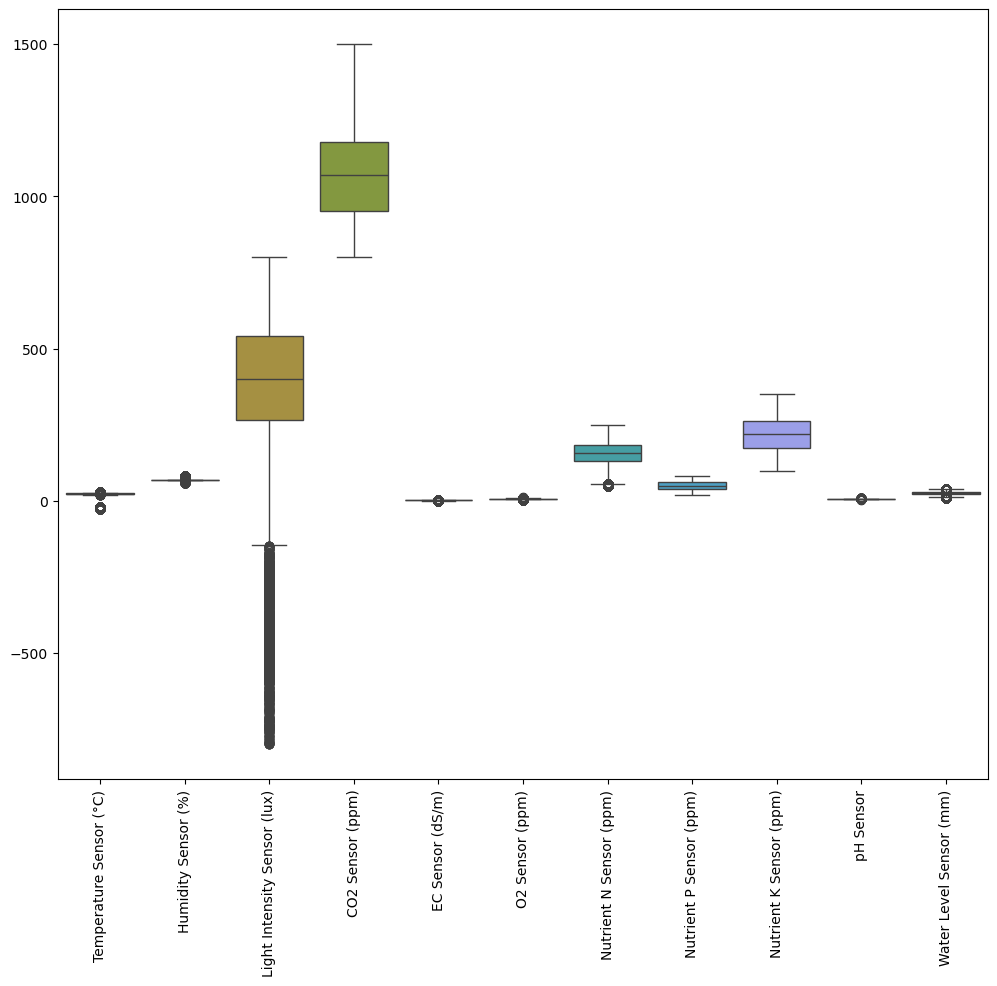

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
#boxplit to visualise outliers
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12,10))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.show()


As we can see, outliers are present for all columns except CO2 Sensor and Nutrient P, K. There are also extreme negative values for Light intensity. We will need to remove these outliers.

In [71]:
def remove_outliers_iqr(df):
    
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75) 
        IQR = Q3 - Q1  # Interquartile range

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply filtering to remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Apply the function to remove outliers
df = remove_outliers_iqr(df)

Next we will plot histograms to check normality

<Figure size 1500x1200 with 0 Axes>

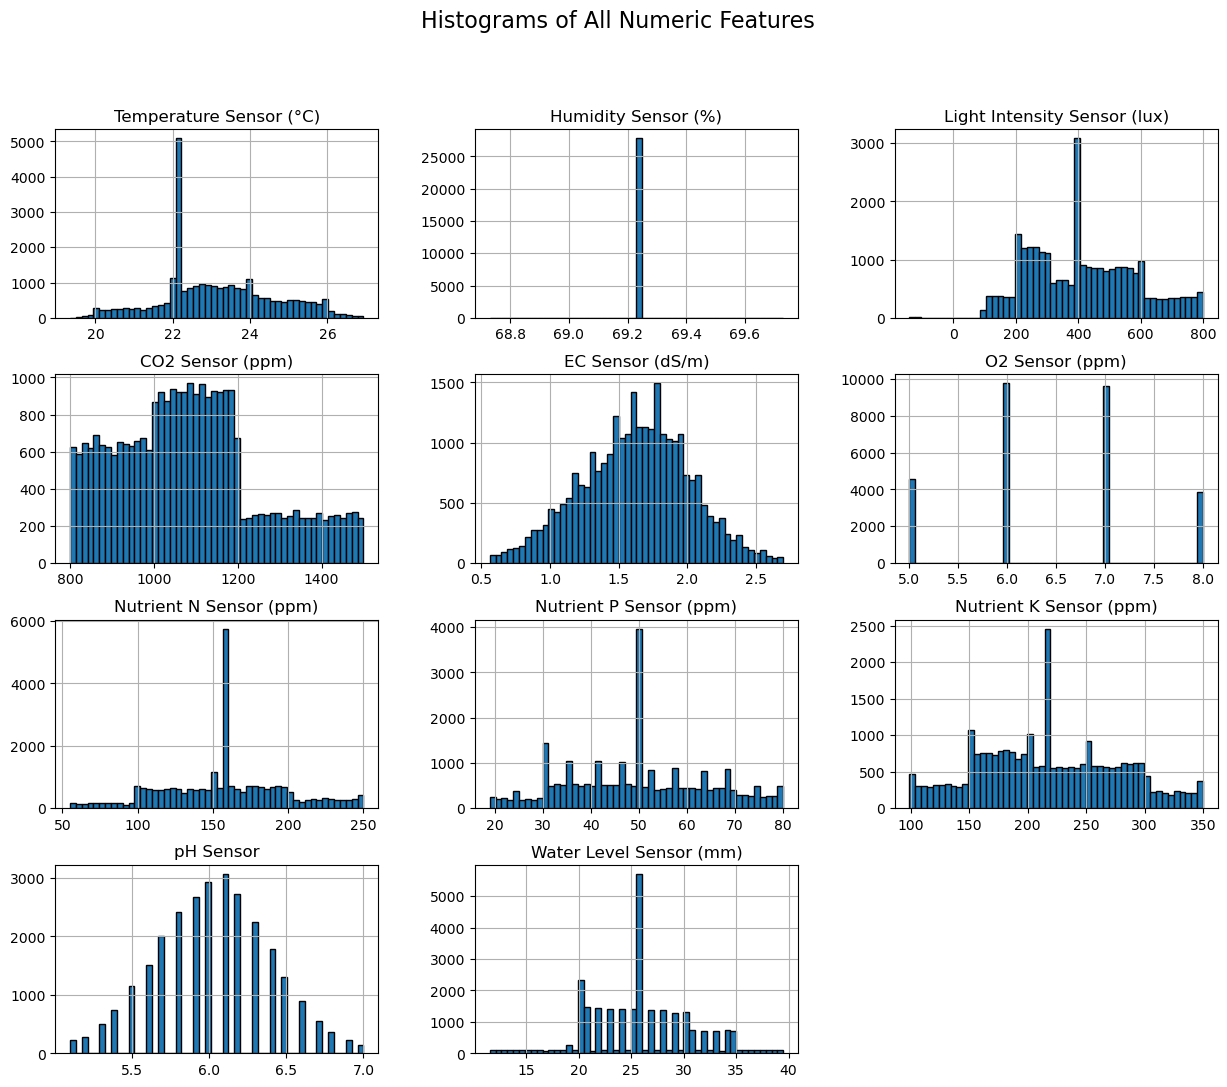

In [72]:
plt.figure(figsize=(15, 12))
df[numeric_columns].hist(bins=50, figsize=(15, 12), layout=(4, 3), edgecolor='black')
plt.suptitle("Histograms of All Numeric Features", fontsize=16)
plt.show()

EC sensor and PH sensor shows a strong normal distribution. The nutrient, CO2 and water sensors shows irregular distribution with sharp peaks at the mean. Humidity values are all around mean with little variability. The rest also displays normality but not as strong with Temperature being left skewed too. Next we will plot Heatmaps to observe correlation.

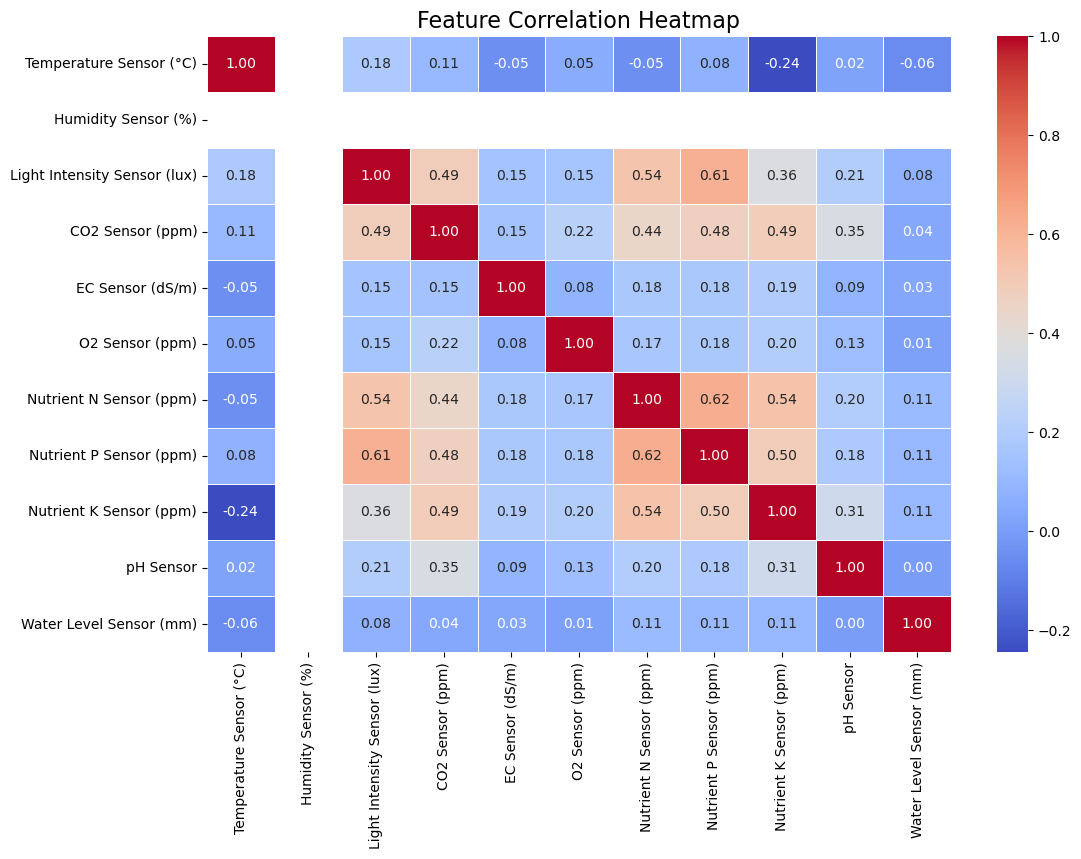

In [73]:
corr_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

As we can see from above, there is a correlation between Nutrient P and Light sensor (0.61), Nutrient N Sensor (ppm) and Nutrient P Sensor (ppm) (0.62), Nutrient N with Light sensor (0.54), and Nutrient K with Nutrient N sensor(0.54). However these are not strong corelations as thier value <0.7. There is also a slight negative correlation with Temperature and Nutrient K sensor. 

Next we will explore the relationships between variables with scatterplots.

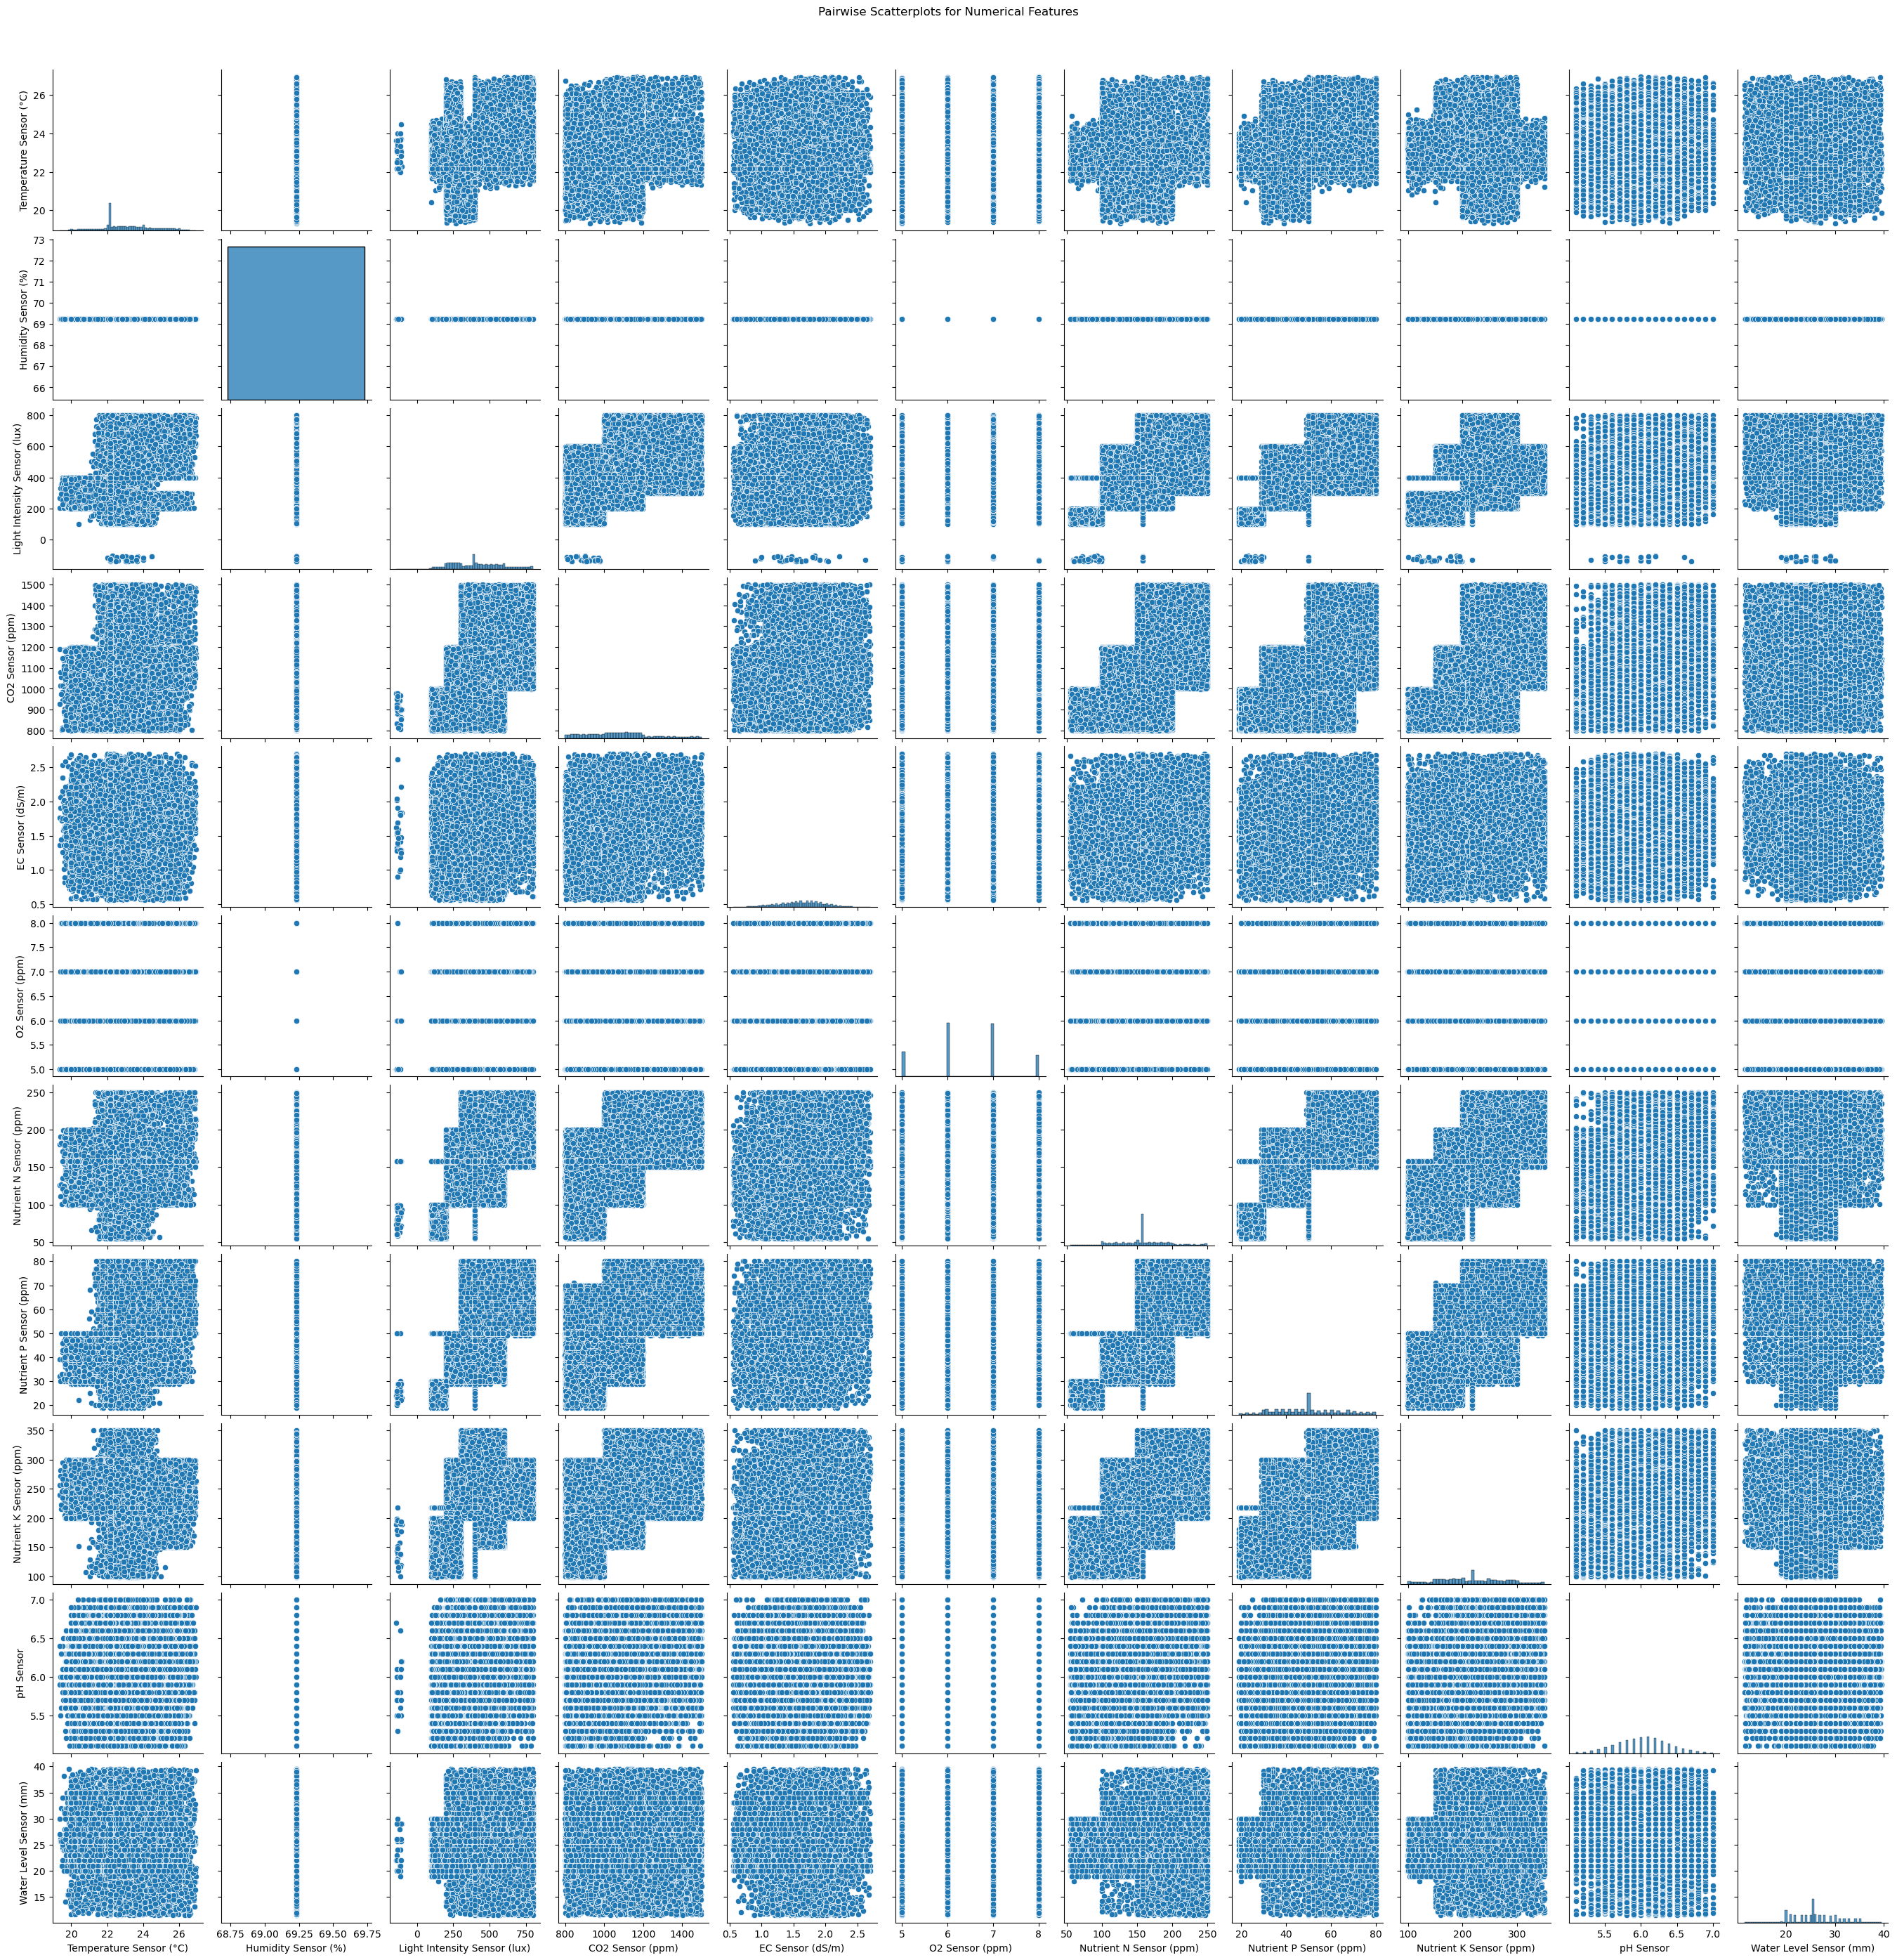

In [74]:
sns.pairplot(df[numerical_columns])
plt.suptitle("Pairwise Scatterplots for Numerical Features", y=1.02)
plt.show()

From the scatterplots, we could not really identify any linear relationships or pattern between each variable.